80% CI = [100.4, 107.9]


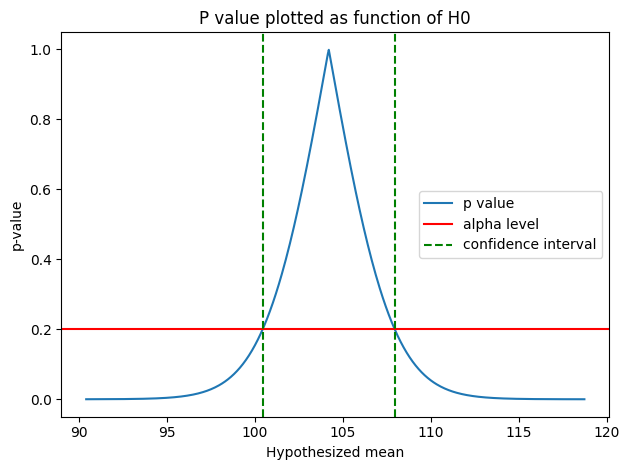

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# define population (normal distribution)
pop_mu = 100
pop_sigma = 10

# draw a sample from the population
n = 20
sample = np.random.normal(pop_mu, pop_sigma, n)

# compute the confidence interval
CI_level = 80
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1) 
alpha = (100 - CI_level)/100
t_value = t.ppf(1 - alpha/2, n-1)

# compute 95% confidence interval
CI_lower = sample_mean - t_value * (sample_std / np.sqrt(n))
CI_upper = sample_mean + t_value * (sample_std / np.sqrt(n))

print(f"{CI_level:.0f}% CI = [{CI_lower:.1f}, {CI_upper:.1f}]")

# loop over many hypothesized values
hypo_list = []
p_list = []
for hypo in np.linspace(CI_lower*.9, CI_upper*1.1, 500):
    sample_mean = sample.mean()
    sample_std = sample.std(ddof = 1)   # use ddof = 1 to compute with n-1 as divisor (since we deal with a sample - https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation)

    t_value = (sample_mean - hypo) / (sample_std / n**0.5)
    p_value = t.sf(abs(t_value), n - 1) * 2  # times 2 because we want to do two-tailed

    hypo_list.append(hypo)
    p_list.append(p_value)
    
# plot the results
plt.plot(hypo_list, p_list)
plt.axhline(y=alpha, color='r', linestyle='-')
plt.axvline(x=CI_lower, color='g', linestyle='--')
plt.axvline(x=CI_upper, color='g', linestyle='--')
plt.xlabel('Hypothesized mean')
plt.ylabel('p-value')
plt.title('P value plotted as function of H0')
plt.legend(['p value','alpha level','confidence interval'], loc = 'right')
plt.tight_layout()
plt.show()